In [15]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
df=pd.read_csv("C:/Users/DELL/Downloads/^GSPC.csv")

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-21,2996.479980,3007.330078,2995.350098,3006.719971,3006.719971,3271620000
1,2019-10-22,3010.729980,3014.570068,2995.040039,2995.989990,2995.989990,3523890000
2,2019-10-23,2994.010010,3004.780029,2991.209961,3004.520020,3004.520020,3392870000
3,2019-10-24,3014.780029,3016.070068,3000.419922,3010.290039,3010.290039,3692600000
4,2019-10-25,3003.320068,3027.389893,3001.939941,3022.550049,3022.550049,3370370000


In [18]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-21,2996.479980,3007.330078,2995.350098,3006.719971,3006.719971,3271620000
1,2019-10-22,3010.729980,3014.570068,2995.040039,2995.989990,2995.989990,3523890000
2,2019-10-23,2994.010010,3004.780029,2991.209961,3004.520020,3004.520020,3392870000
3,2019-10-24,3014.780029,3016.070068,3000.419922,3010.290039,3010.290039,3692600000
4,2019-10-25,3003.320068,3027.389893,3001.939941,3022.550049,3022.550049,3370370000


In [19]:
df.set_index('Date',inplace=True)

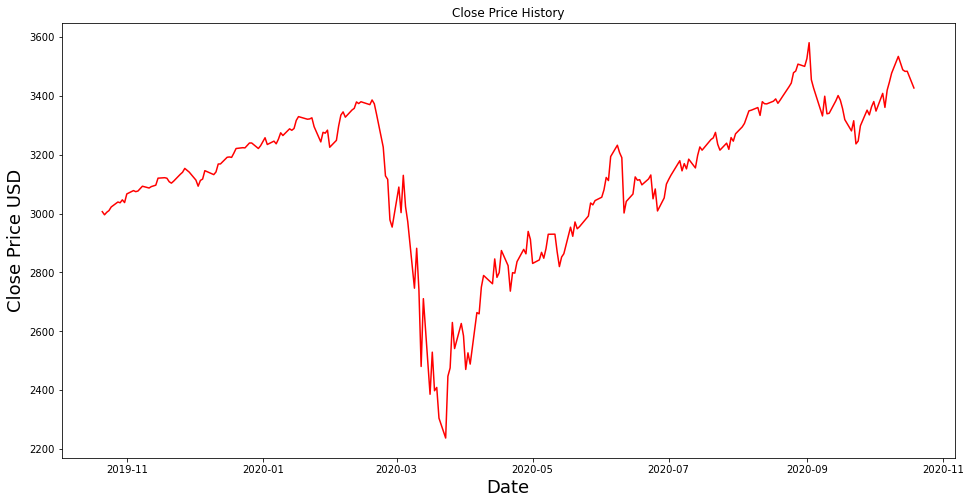

In [20]:
#plotting the data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [21]:
import math
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

202

In [22]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.57264929],
       [0.56466235],
       [0.57101174],
       [0.5753067 ],
       [0.58443253],
       [0.59698975],
       [0.5951065 ],
       [0.60246085],
       [0.59560535],
       [0.61745213],
       [0.62590812],
       [0.62319128],
       [0.62479903],
       [0.63105156],
       [0.6369321 ],
       [0.6324138 ],
       [0.6360091 ],
       [0.63764665],
       [0.63957442],
       [0.65731252],
       [0.65848122],
       [0.65710408],
       [0.64838023],
       [0.64471805],
       [0.64974246],
       [0.66712311],
       [0.67224438],
       [0.68200281],
       [0.67258676],
       [0.65240732],
       [0.63702133],
       [0.65158101],
       [0.6550571 ],
       [0.67625639],
       [0.66885007],
       [0.66628952],
       [0.67307052],
       [0.69312365],
       [0.69329484],
       [0.71015447],
       [0.71095098],
       [0.70992367],
       [0.72051605],
       [0.73231401],
       [0.7343908 ],
       [0.73392176],
       [0.74622601],
       [0.746

In [23]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(40,len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i,0])

In [26]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(162, 40, 1)

In [27]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
model.fit(x_train,y_train, batch_size=32, epochs=50)

Epoch 1/50
6/6 [==============================] - 0s 34ms/step - loss: 0.1045
Epoch 2/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0323
Epoch 3/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0268
Epoch 4/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0153
Epoch 5/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0143
Epoch 6/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0183
Epoch 7/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0133
Epoch 8/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0146
Epoch 9/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0116
Epoch 10/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0104
Epoch 11/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0096
Epoch 12/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0120
Epoch 13/50
6/6 [==============================] - 0s 32ms/st

In [28]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-40:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(40,len(test_data)):
    x_test.append(test_data[i-40:i,0])
#convert the data to a numpy array
x_test = np.array(x_test)
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(50, 40, 1)

In [29]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

62.03716317250002

<ipython-input-30-33d98546dee5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
<ipython-input-30-33d98546dee5>:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Train','Valid','Predictions'], loc='upper_center')


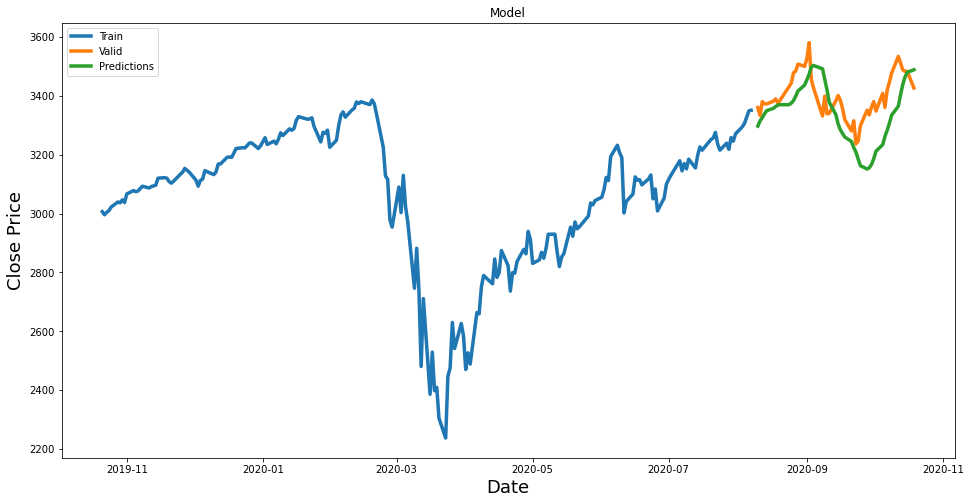

In [30]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')